<a href="https://colab.research.google.com/github/kumuds4/ksa/blob/main/Making_the_Most_of_your_Colab_Subscription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making the Most of your Colab Subscription



## Faster GPUs

Users who have purchased one of Colab's paid plans have access to faster GPUs and more memory. You can upgrade your notebook's GPU settings in `Runtime > Change runtime type` in the menu to select from several accelerator options, subject to availability.

The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability.

You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to `Runtime > Change runtime type` in the menu to enable a GPU accelerator, and then re-execute the code cell.


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In order to use a GPU with your notebook, select the `Runtime > Change runtime type` menu, and then set the hardware accelerator to the desired option.

## More memory

Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available. More powerful GPUs are always offered with high-memory VMs.



You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via `Runtime > Change runtime type` in the menu. Then select High-RAM in the Runtime shape toggle button. After, re-execute the code cell.


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

## Longer runtimes

All Colab runtimes are reset after some period of time (which is faster if the runtime isn't executing code). Colab Pro and Pro+ users have access to longer runtimes than those who use Colab free of charge.

## Background execution

Colab Pro+ users have access to background execution, where notebooks will continue executing even after you've closed a browser tab. This is always enabled in Pro+ runtimes as long as you have compute units available.



## Relaxing resource limits in Colab Pro

Your resources are not unlimited in Colab. To make the most of Colab, avoid using resources when you don't need them. For example, only use a GPU when required and close Colab tabs when finished.



If you encounter limitations, you can relax those limitations by purchasing more compute units via Pay As You Go. Anyone can purchase compute units via [Pay As You Go](https://colab.research.google.com/signup); no subscription is required.

## Send us feedback!

If you have any feedback for us, please let us know. The best way to send feedback is by using the Help > 'Send feedback...' menu. If you encounter usage limits in Colab Pro consider subscribing to Pro+.

If you encounter errors or other issues with billing (payments) for Colab Pro, Pro+, or Pay As You Go, please email [colab-billing@google.com](mailto:colab-billing@google.com).

## More Resources

### Working with Notebooks in Colab
- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colab makes possible, check out these tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!pip install numpy Torch
!pip install torch
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # If using train_test_split
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit  # For curve fitting
from scipy.interpolate import interp1d # For interpolation
import seaborn as sns  # For KDE
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import seaborn as sns
from scipy.signal import savgol_filter
from sklearn.metrics import confusion_matrix
# Logger configuration
import logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
handler = logging.StreamHandler()
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)


class CRC:
    def __init__(self, polynomial=0b10011011, order=7):
        self.polynomial = polynomial
        self.order = order

    def generate_crc(self, data):
        data_with_zeros = np.concatenate([data, np.zeros(self.order, dtype=int)])

        for i in range(len(data)):
            if data_with_zeros[i] == 1:
                for j in range(self.order + 1):
                    data_with_zeros[i+j] ^= ((self.polynomial >> j) & 1)

        return data_with_zeros[-self.order:]


    def verify_crc(self, data, received_crc):
        full_data = np.concatenate([data, received_crc])

        for i in range(len(data)):
            if full_data[i] == 1:
                for j in range(self.order + 1):
                    full_data[i+j] ^= ((self.polynomial >> j) & 1)

        return np.all(full_data[-self.order:] == 0)


    # ... (existing CRC implementation)



# Then, add the new PolarCodeGenerator class
class PolarCodeGenerator:


    def __init__(self, N=128, K=64):
        self.N = N  # Total block length
        self.K = K  # Number of information bits
        self.R = K/N  # Code rate
        self.crc = CRC()  # CRC object

    def generate_polar_code_matrix(self):
        """
        Generate channel polarization using Bhattacharyya parameter method
        """
        def bhattacharyya_parameter(W, n):
            if n == 0:
                return W
            W_used = bhattacharyya_parameter(W, n-1)
            W_transform = 2 * W_used**2 - W_used**4
            return W_transform

        # Compute Bhattacharyya parameters for each channel
        channel_capacities = []
        for i in range(self.N):
            W = 0.5  # Binary symmetric channel
            capacity = bhattacharyya_parameter(W, int(np.log2(self.N)))
            channel_capacities.append(capacity)

        # Sort and select best channels for information bits
        sorted_indices = np.argsort(channel_capacities)
        info_indices = sorted_indices[self.N - self.K:]

        return info_indices

    def polar_transform(self, u):
        """
        Recursive Polar Transform (Arıkan's Polarization Transform)
        """
        n = int(np.log2(len(u)))
        for i in range(n):
            u1 = np.zeros(len(u), dtype=int)
            for j in range(len(u) // 2):
                # Butterfly operation
                u1[2*j] = np.mod(u[j] + u[j + len(u)//2], 2)
                u1[2*j + 1] = u[j + len(u)//2]
            u = u1
        return u

    def encode(self, info_bits):
        """
        Polar Encoding Process
        1. Add CRC
        2. Polar Encoding
        """
        # Add CRC to information bits
        crc_bits = self.crc.generate_crc(info_bits)
        full_info = np.concatenate([info_bits, crc_bits])

        # Polar Encoding
        encoded_bits = self._polar_encode(full_info)

        return encoded_bits

    def _polar_encode(self, bits):
        """
        Detailed Polar Encoding Implementation
        """
        # Initialize codeword
        x = np.zeros(self.N, dtype=int)

        # Determine information bit positions
        info_indices = self.generate_polar_code_matrix()

        # Assign information bits to selected indices
        x[info_indices] = bits

        # Polar transformation
        n = int(np.log2(self.N))
        for i in range(n):
            for j in range(0, self.N, 2**(i+1)):
                for k in range(2**i):
                    # Butterfly operation
                    u = x[j+k]
                    v = x[j+k+2**i]
                    x[j+k] = (u + v) % 2
                    x[j+k+2**i] = v

        return x

    def systematic_polar_encode(self, info_bits):
        """
        Systematic Polar Encoding
        Preserves original information bits in specific positions
        """
        # Add CRC
        crc_bits = self.crc.generate_crc(info_bits)
        full_info = np.concatenate([info_bits, crc_bits])

        # Initialize codeword
        x = np.zeros(self.N, dtype=int)

        # Determine information bit positions
        info_indices = self.generate_polar_code_matrix()

        # Assign information bits to selected indices
        x[info_indices] = full_info

        # Polar transformation
        n = int(np.log2(self.N))
        for i in range(n):
            for j in range(0, self.N, 2**(i+1)):
                for k in range(2**i):
                    # Butterfly operation
                    u = x[j+k]
                    v = x[j+k+2**i]
                    x[j+k] = (u + v) % 2
                    x[j+k+2**i] = v

        return x  # ... (the entire implementation I just provided)

class PolarCodeGenerator:
    def __init__(self, N=128, K=64):
        self.N = N
        self.K = K
        self.R = K/N
        self.crc = CRC()

    def generate_polar_code_matrix(self):
        def bhattacharyya_parameter(W, n):
            if n == 0:
                return W
            W_used = bhattacharyya_parameter(W, n-1)
            W_transform = 2 * W_used**2 - W_used**4
            return W_transform

        channel_capacities = []
        for i in range(self.N):
            W = 0.5
            capacity = bhattacharyya_parameter(W, int(np.log2(self.N)))
            channel_capacities.append(capacity)

        sorted_indices = np.argsort(channel_capacities)
        info_indices = sorted_indices[self.N - self.K:]

        return info_indices

    def encode(self, info_bits):
        crc_bits = self.crc.generate_crc(info_bits)
        full_info = np.concatenate([info_bits, crc_bits])
        encoded_bits = self._polar_encode(full_info)
        return encoded_bits

    def _polar_encode(self, bits):
         n = int(np.log2(self.N))
         x = np.zeros(self.N, dtype=int)
         x[:len(bits)] = bits

         for i in range(n):
            for j in range(0, self.N, 2**(i+1)):
                for k in range(2**i):
                    u = x[j+k]
                    v = x[j+k+2**i]
                    x[j+k] = (u + v) % 2
                    x[j+k+2**i] = v


         return x  # Return the encoded bits
class SCLDecoder:
    def __init__(self, list_size=8):
        self.list_size = list_size

    def decode(self, received_signal, info_indices, block_length):
        N = block_length  # Code length
        K = len(info_indices)  # Number of information bits
        L = self.list_size  # List size

        # Initialize lists
        active_paths = [([0] * K, 0)]  # (path, path metric)

        for i in range(N):
            new_paths = []
            for path, metric in active_paths:
                # Calculate likelihoods for 0 and 1
                llr = self._calculate_llr(received_signal[i])  # Replace with your LLR calculation

                # Extend paths for both 0 and 1
                path0 = path + [0]
                path1 = path + [1]

                # Update path metrics
                metric0 = metric + (0 if llr > 0 else -llr)
                metric1 = metric + (0 if llr <= 0 else llr)

                new_paths.extend([(path0, metric0), (path1, metric1)])

            # Sort and prune paths
            new_paths = sorted(new_paths, key=lambda x: x[1])  # Sort by path metric
            active_paths = new_paths[:L]  # Keep only L best paths

        # Select best path
        best_path, _ = active_paths[0]

        decoded_bits = np.array(best_path)  # Convert to numpy array
        return decoded_bits[:K]  # Extract information bits

    def _calculate_llr(self, received_symbol):
        # Calculate Log-Likelihood Ratio (LLR)
        # This is a placeholder and needs to be replaced with your actual LLR calculation logic
        # Example: For AWGN channel
        # llr = 2 * received_symbol / (noise_variance ** 2)
        # ...
        return 0 # Placeholder, replace with actual calculation

class PolarCodeSimulation:
    def __init__(self, block_length, info_bits, snr_range, hidden_layers, learning_rate, epochs, batch_size, list_sizes=[1, 8, 16]):
        self.block_length = block_length
        self.info_bits = info_bits
        self.snr_range = snr_range
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.list_sizes = list_sizes

        try:
            # ... your code ...
            logger.info("PolarCodeSimulation initialized successfully")
        except Exception as e:
            logger.error(f"PolarCodeSimulation initialization error: {e}")
            raise


    def plot_training_validation_loss(self, train_losses, val_losses):
        plt.figure(figsize=(10, 6))
        plt.plot(train_losses, label='Training Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_confusion_matrix(self, y_true, y_pred):
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Decoder Performance Confusion Matrix')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

    def plot_ber_bler(self, snr_range, ber_traditional, ber_ml, bler_traditional, bler_ml):
        plt.figure(figsize=(12, 6))

        # BER Plot
        plt.subplot(1, 2, 1)
        plt.semilogy(snr_range, ber_traditional, label='Traditional BER')
        plt.semilogy(snr_range, ber_ml, label='ML BER')
        plt.title('Bit Error Rate')
        plt.xlabel('SNR (dB)')
        plt.ylabel('BER')
        plt.legend()
        plt.grid(True)

        # BLER Plot
        plt.subplot(1, 2, 2)
        plt.semilogy(snr_range, bler_traditional, label='Traditional BLER')
        plt.semilogy(snr_range, bler_ml, label='ML BLER')
        plt.title('Block Error Rate')
        plt.xlabel('SNR (dB)')
        plt.ylabel('BLER')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    def plot_training_metrics(self, train_losses, val_losses, snr_range,
                               ber_traditional, ber_ml,
                               bler_traditional, bler_ml,
                               y_true, y_pred):
        # Plot Training and Validation Loss
        self.plot_training_validation_loss(train_losses, val_losses)

        # Plot Confusion Matrix
        self.plot_confusion_matrix(y_true, y_pred)

        # Plot BER/BLER
        self.plot_ber_bler(snr_range, ber_traditional, ber_ml,
                           bler_traditional, bler_ml)




    def evaluate_performance(self, ml_model):
        num_trials = 1000  # Number of simulations for each SNR
        ber_traditional_list = {list_size: [] for list_size in self.list_sizes}
        ber_ml_list = []
        bler_traditional_list = {list_size: [] for list_size in self.list_sizes}
        bler_ml_list = []
        info_indices = self.polar_code_gen.generate_polar_code_matrix()  # Get info bit indices

        for snr in self.snr_range:
            for list_size in self.list_sizes:  # Iterate over the list sizes
                ber_traditional = 0
                ber_ml = 0
                bler_traditional = 0
                bler_ml = 0
                scl_decoder = SCLDecoder(list_size=list_size)  # Create SCLDecoder with current list size

                for _ in range(num_trials):
                    info_bits = np.random.randint(2, size=self.info_bits)
                    encoded_bits = self.polar_code_gen.encode(info_bits)
                    received_signal = self.channel_simulator.transmit(encoded_bits, snr)

                    # Traditional Decoding (SCL)
                    decoded_bits_traditional = scl_decoder.decode(received_signal, info_indices, self.block_length)

                    # ML Decoding
                    received_signal_tensor = torch.tensor(received_signal, dtype=torch.float32).to(ml_model.device)
                    decoded_bits_ml = ml_model(received_signal_tensor).cpu().detach().numpy()
                    decoded_bits_ml = (decoded_bits_ml > 0.5).astype(int)

                    # Calculate Errors
                    ber_traditional += np.sum(np.abs(info_bits - decoded_bits_traditional)) / self.info_bits
                    ber_ml += np.sum(np.abs(info_bits - decoded_bits_ml)) / self.info_bits
                    bler_traditional += int(np.any(info_bits != decoded_bits_traditional))
                    bler_ml += int(np.any(info_bits != decoded_bits_ml))

                # Average Errors over Trials and store in the dictionaries
                ber_traditional_list[list_size].append(ber_traditional / num_trials)
                ber_ml_list.append(ber_ml / num_trials)
                bler_traditional_list[list_size].append(bler_traditional / num_trials)
                bler_ml_list.append(bler_ml / num_trials)

        # Update simulation results
        self.ber_traditional = ber_traditional_list
        self.ber_ml = ber_ml_list
        self.bler_traditional = bler_traditional_list
        self.bler_ml = bler_ml_list

        return ber_traditional_list, ber_ml_list, bler_traditional_list, bler_ml_list

          # Evaluation and Plotting
        ber_traditional, ber_ml, bler_traditional, bler_ml = self.evaluate_performance(trainer.model)  # Unpack results here
        # Get y_true and y_pred (you might need to modify this based on your setup)
        y_true = ...  # Replace ... with your actual y_true data
        y_pred = ...  # Replace ... with your actual y_pred data

        # Call the plotting functions
        self.plot_training_metrics(train_losses, val_losses, self.snr_range,
                                   ber_traditional, ber_ml,
                                   bler_traditional, bler_ml,
                                   y_true, y_pred)

        self.plot_confusion_matrix(y_true, y_pred)  # Call confusion matrix plotting

    def run_simulation(self):
         # Training
          model = MLPolarDecoder(input_size=self.block_length, hidden_layers=self.hidden_layers, output_size=self.info_bits)
          trainer = MLTrainer(model, learning_rate=self.learning_rate)
          X_train, y_train = trainer.generate_training_data(num_samples=1000, block_length=self.block_length, snr_range=self.snr_range)
         #model = MLPolarDecoder(input_size=self.block_length, hidden_layers=self.hidden_layers, output_size=self.info_bits)
         #trainer = MLTrainer(model, learning_rate=self.learning_rate)
         #X_train, y_train = trainer.generate_training_data(num_samples=1000, block_length=self.block_length, snr_range=self.snr_range)
          train_losses, val_losses = trainer.train(X_train, y_train, epochs=self.epochs, batch_size=self.batch_size)

         # Evaluation and Plotting
          ber_traditional, ber_ml, bler_traditional, bler_ml = self.evaluate_performance(trainer.model)  # Unpack results here

         # Assuming you have a separate dataset for evaluation:
          X_eval, y_true = trainer.generate_training_data(num_samples=1000, block_length=self.block_length, snr_range=self.snr_range)  # Example for generating evaluation data
          received_signal_tensor = torch.tensor(X_eval, dtype=torch.float32).to(trainer.device)  # Convert to tensor and move to device
          y_pred = trainer.model(received_signal_tensor).cpu().detach().numpy()  # Get predictions using the trained model
          y_pred = (y_pred > 0.5).astype(int)  # Convert to binary

          # Call the plotting functions with y_true and y_pred
          self.plot_training_metrics(train_losses, val_losses, self.snr_range,
                               ber_traditional, ber_ml,
                               bler_traditional, bler_ml,
                               y_true, y_pred)

         # Call the plotting functions with y_true and y_pred
          self.plot_ber_bler(self.snr_range,
                             ber_traditional, ber_ml,
                             bler_traditional, bler_ml,
                             ber_traditional, ber_ml,
                             bler_traditional, bler_ml)  # Duplicate for both AWGN and Rayleigh for now
    #self.plot_ber_bler(snr_range, ber_traditional, ber_ml, bler_traditional, bler_ml) # Assuming plot_ber_bler in the same class


          self.plot_confusion_matrix(y_true, y_pred)  # Call confusion matrix plotting
    #def plot_training_metrics(self, train_losses, val_losses, snr_range, ber_traditional, ber_ml, bler_traditional, bler_ml):
    #    plt.figure(figsize=(15, 10))


# Example usage:
#simulation = PolarCodeSimulation()
#simulation.run_simulation()

class ListDecoder:
    def __init__(self, list_size=8):
        self.list_size = list_size

    def decode(self, received_signal):
        # Placeholder for list decoding algorithm
        # Implement Tal-Vardy list decoding
        pass

class ChannelSimulator:
    def __init__(self, channel_type='AWGN'):
        self.channel_type = channel_type

    def transmit(self, signal, snr):
        if self.channel_type == 'AWGN':
            return self.awgn_channel(signal, snr)
        elif self.channel_type == 'Rayleigh':
            return self.rayleigh_fading_channel(signal, snr)

    def awgn_channel(self, signal, snr):
        noise_std = 10 ** (-snr/20)
        noise = np.random.normal(0, noise_std, signal.shape)
        return signal + noise

    def rayleigh_fading_channel(self, signal, snr):
        fading_coeff = np.random.rayleigh(scale=1, size=signal.shape)
        noisy_signal = fading_coeff * signal
        noise_std = 10 ** (-snr/20)
        noise = np.random.normal(0, noise_std, signal.shape)
        return noisy_signal + noise

class MLPolarDecoder(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(MLPolarDecoder, self).__init__()
        layers = []
        # Dynamic layer creation
        prev_size = input_size
        for i, hidden_size in enumerate(hidden_layers):
            layers.append(nn.Linear(prev_size, hidden_size))
            # Change the num_features to 128 for the first InstanceNorm1d:
            if i == 0:  # For the first InstanceNorm1d layer
                layers.append(nn.InstanceNorm1d(128, affine=True))  # num_features=128
            else:
                layers.append(nn.InstanceNorm1d(hidden_size, affine=True))  # num_features=hidden_size
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.3))
            prev_size = hidden_size

        layers.append(nn.Linear(prev_size, output_size))
        layers.append(nn.Sigmoid())

        self.model = nn.Sequential(*layers)
        self.to(self.device)  # Move the model to the device

    def forward(self, x):
          x = torch.unsqueeze(x, 1)  # Adds a dimension of size 1 at position 1
          return self.model(x)

class PolarCodeTrainer:
    def __init__(self, model, learning_rate=1e-3):
        self.model = model
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)

        self.criterion = nn.BCELoss()
        self.optimizer = optim.Adam(
            self.model.parameters(),
            lr=learning_rate,
            weight_decay=1e-5
        )

        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer,
            mode='min',
            factor=0.5,
            patience=5
        )

   # def train(self, X_train, y_train, epochs=50, batch_size=64):

def train(self, X_train, y_train, epochs=100, batch_size=32):
    # 1. Split data using train_test_split
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    train_losses = []
    val_losses = []  # Initialize list for validation losses


    dataset = torch.utils.data.TensorDataset(X_train, y_train)
    dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=True
    )

    for epoch in range(epochs):
        self.model.train()
        epoch_loss = 0

        for batch_x, batch_y in dataloader:
            batch_x = batch_x.to(self.device)
            batch_y = batch_y.to(self.device)

            self.optimizer.zero_grad()
            outputs = self.model(batch_x)
            loss = self.criterion(outputs, batch_y)
            loss.backward()
            self.optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(dataloader)
        train_losses.append(avg_loss)

        self.scheduler.step(avg_loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {avg_loss:.4f}")

        # Calculate validation loss
        self.model.eval()
        with torch.no_grad():
            val_outputs = self.model(X_val.to(self.device))
            val_loss = self.criterion(val_outputs, y_val.to(self.device))
            val_losses.append(val_loss.item())

    return train_losses, val_losses # The return is outside the loop

class MLPolarDecoder(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        #self.model = model
        # Access device through the model
        #self.device = self.model.device  # Add this line
        #self.model.to(self.device)

        super(MLPolarDecoder, self).__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Define device here
        layers = []
        # Dynamic layer creation
        prev_size = input_size
        for i, hidden_size in enumerate(hidden_layers):
            layers.append(nn.Linear(prev_size, hidden_size))
            # Reshape the input for BatchNorm1d
            if i == 0:  # Only for the first BatchNorm1d layer
                layers.append(ReshapeLayer((-1, hidden_size)))  # Reshape to (batch_size, hidden_size)
            layers.append(nn.BatchNorm1d(hidden_size))  # num_features=hidden_size
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.3))
            prev_size = hidden_size

        layers.append(nn.Linear(prev_size, output_size))
        layers.append(nn.Sigmoid())

        self.model = nn.Sequential(*layers)
        self.to(self.device)  # Move the model to the device

    def forward(self, x):
        return self.model(x)

# Custom Reshape Layer
class ReshapeLayer(nn.Module):
    def __init__(self, shape):
        super(ReshapeLayer, self).__init__()
        self.shape = shape

    def forward(self, x):
        return x.view(self.shape)


    #def forward(self, x):
       #  x = x.to(self.device)  # Move input to the device
        # x = torch.unsqueeze(x, 1)  # Add a dimension to make it 2D
        # ... your model calculations ...
         #output = self.model(x) # Assuming self.model is your sequential model
         #return output
       # return self.model(x)



class MLTrainer:
    def __init__(self, model, learning_rate=1e-3):
        self.model = model
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.device = self.model.device # Add this line
        self.model.to(self.device)
      #  input_tensor = input_tensor.to(self.device)
        # Loss and Optimizer
        self.criterion = nn.BCELoss()
        self.optimizer = optim.Adam(
            self.model.parameters(),
            lr=learning_rate,
            weight_decay=1e-5
        )

        # Learning rate scheduler
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer,
            mode='min',
            factor=0.5,
            patience=5
        )

    def train(self, X_train, y_train, epochs=100, batch_size=32):
        # 1. Split data using train_test_split
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42
        )
        train_losses = []
        val_losses = []  # Initialize list for validation losses

        dataset = torch.utils.data.TensorDataset(X_train, y_train)
        dataloader = torch.utils.data.DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=True
        )

        for epoch in range(epochs):
            self.model.train()
            epoch_loss = 0

            for batch_x, batch_y in dataloader:
                batch_x = batch_x.to(self.device)
                batch_y = batch_y.to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(batch_x)
                loss = self.criterion(outputs, batch_y)
                loss.backward()
                self.optimizer.step()

                epoch_loss += loss.item()

            avg_loss = epoch_loss / len(dataloader)
            train_losses.append(avg_loss)

            self.scheduler.step(avg_loss)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Loss = {avg_loss:.4f}")

            # Calculate validation loss
            self.model.eval()
            with torch.no_grad():
                val_outputs = self.model(X_val.to(self.device))
                val_loss = self.criterion(val_outputs, y_val.to(self.device))
                val_losses.append(val_loss.item())

        return train_losses, val_losses # The return is inside the loop



             #  return (torch.FloatTensor(X_train),
              #     torch.FloatTensor(y_train))

def generate_training_data(self, num_samples, block_length, snr_range):
    X_train = []
    y_train = []

    polar_code_gen = PolarCodeGenerator(N=block_length, K=block_length // 2)

    # Outer loop to iterate through SNR values
    for snr in snr_range:
        # Inner loop to generate samples for each SNR value
        for _ in range(num_samples):
            # 1. Generate random information bits
            info_bits = np.random.randint(2, size=block_length // 2)

            # 2. Encode the information bits
            encoded_bits = polar_code_gen.encode(info_bits)

            # 3. Apply channel noise
            noisy_signal = self._apply_channel_noise(encoded_bits, snr)  # Replace with your channel noise application logic

            # 4. Append to X_train and y_train
            X_train.append(noisy_signal)
            y_train.append(info_bits)

    # Convert to single NumPy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Check final shapes after generation (should be (1000, 128) and (1000, 64) respectively)
    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    print("X_train dtype:", X_train.dtype)
    print("y_train dtype:", y_train.dtype)

    return torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)

    def _polar_encode(self, bits):
        # Simplified polar encoding
        # Implement actual polar encoding logic
        return bits

    def _apply_channel_noise(self, signal, snr):
        # AWGN channel simulation
        noise_std = 10 ** (-snr/20)
        noise = np.random.normal(0, noise_std, signal.shape)
        return signal + noise



    # (Optional: Access results and plot separately if needed)
    # ber_traditional, ber_ml, bler_traditional, bler_ml = simulation.evaluate_performance(trainer.model)
    # simulation.plot_training_metrics(trainer.train_losses, trainer.val_losses, SNR_RANGE, ber_traditional, ber_ml, bler_traditional, bler_ml, [], [])  # Assuming you have y_true and y_pred
    # simulation.plot_confusion_matrix([], [])  # Assuming you have y_true and y_pred

class MLTrainer:
    def __init__(self, model, learning_rate=1e-3):
        self.model = model
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.device = self.model.device
        self.model.to(self.device)
        self.criterion = nn.BCELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate, weight_decay=1e-5)
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, mode='min', factor=0.5, patience=5)

    def train(self, X_train, y_train, epochs=100, batch_size=32):
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
        train_losses = []
        val_losses = []
        dataset = torch.utils.data.TensorDataset(X_train, y_train)
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
        for epoch in range(epochs):
            self.model.train()
            epoch_loss = 0
            for batch_x, batch_y in dataloader:
                batch_x = batch_x.to(self.device)
                batch_y = batch_y.to(self.device)
                self.optimizer.zero_grad()
                outputs = self.model(batch_x)
                loss = self.criterion(outputs, batch_y)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
            avg_loss = epoch_loss / len(dataloader)
            train_losses.append(avg_loss)
            self.scheduler.step(avg_loss)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Loss = {avg_loss:.4f}")
            self.model.eval()
            with torch.no_grad():
                val_outputs = self.model(X_val.to(self.device))
                val_loss = self.criterion(val_outputs, y_val.to(self.device))
                val_losses.append(val_loss.item())
        return train_losses, val_losses

    def generate_training_data(self, num_samples, block_length, snr_range):
        X_train = []
        y_train = []
        polar_code_gen = PolarCodeGenerator(N=block_length, K=block_length // 2)
        for snr in snr_range:
            for _ in range(num_samples):
                info_bits = np.random.randint(2, size=block_length // 2)
                encoded_bits = polar_code_gen.encode(info_bits)
                noisy_signal = self._apply_channel_noise(encoded_bits, snr)
                X_train.append(noisy_signal)
                y_train.append(info_bits)
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        print("X_train shape:", X_train.shape)
        print("y_train shape:", y_train.shape)
        print("X_train dtype:", X_train.dtype)
        print("y_train dtype:", y_train.dtype)
        return torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)

    def _apply_channel_noise(self, signal, snr):
        noise_std = 10**(-snr / 20)
        noise = np.random.normal(0, noise_std, signal.shape)
        return signal + noise

class ChannelSimulator:
    def __init__(self, channel_type='AWGN'):
        self.channel_type = channel_type

    def transmit(self, signal, snr):
        if self.channel_type == 'AWGN':
            return self.awgn_channel(signal, snr)
        elif self.channel_type == 'Rayleigh':
            return self.rayleigh_fading_channel(signal, snr)

    def awgn_channel(self, signal, snr):
        noise_std = 10**(-snr / 20)
        noise = np.random.normal(0, noise_std, signal.shape)
        return signal + noise

    def rayleigh_fading_channel(self, signal, snr):
        fading_coeff = np.random.rayleigh(scale=1, size=signal.shape)
        noisy_signal = fading_coeff * signal
        noise_std = 10**(-snr / 20)
        noise = np.random.normal(0, noise_std, signal.shape)
        return noisy_signal + noise

class PolarCodeSimulation:
    def __init__(self, block_length, info_bits, snr_range, hidden_layers,
                 learning_rate, epochs, batch_size, list_sizes=[1, 8, 16]):
        """
        Initialize Polar Code Simulation
         # Initialize ChannelSimulator
        #self.channel_simulator = ChannelSimulator()  # Create an instance

        Args:
            block_length (int): Total block length
            info_bits (int): Number of information bits
            snr_range (np.ndarray): Signal-to-Noise Ratio range
            hidden_layers (list): Neural network hidden layer configuration
            learning_rate (float): Learning rate for training
            epochs (int): Number of training epochs
            batch_size (int): Training batch size
            list_sizes (list): List of SCL decoder list sizes
        """
        try:
            self.block_length = block_length
            self.info_bits = info_bits
            self.snr_range = snr_range
            self.hidden_layers = hidden_layers
            self.learning_rate = learning_rate
            self.epochs = epochs
            self.batch_size = batch_size
            self.list_sizes = list_sizes
            self.channel_simulator = ChannelSimulator()  # Create an instance

            logger.info("PolarCodeSimulation initialized successfully")

        except Exception as e:
            logger.error(f"PolarCodeSimulation initialization error: {e}")
            raise

    def plot_training_validation_loss(self, train_losses, val_losses):
        """
        Plot training and validation losses

        Args:
            train_losses (list): Training losses
            val_losses (list): Validation losses
        """
        try:
            plt.figure(figsize=(10, 6))
            plt.plot(train_losses, label='Training Loss')
            plt.plot(val_losses, label='Validation Loss')
            plt.title('Training and Validation Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)
            plt.show()

        except Exception as e:
            logger.error(f"Training loss plot error: {e}")

    def plot_confusion_matrix(self, y_true, y_pred, title='Decoder Performance Confusion Matrix'):
        """
        Plot confusion matrix

        Args:
            y_true (np.ndarray): True labels
            y_pred (np.ndarray): Predicted labels
            title (str): Plot title
        """
        try:
            import seaborn as sns
            from sklearn.metrics import confusion_matrix, classification_report

            # Ensure 1D arrays
            y_true = y_true.ravel()
            y_pred = y_pred.ravel()

            # Compute confusion matrix
            cm = confusion_matrix(y_true, y_pred)

            # Compute classification report
            cr = classification_report(y_true, y_pred)
            print("Classification Report:\n", cr)

            # Plot
            plt.figure(figsize=(10, 8))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=['Predicted 0', 'Predicted 1'],
                        yticklabels=['Actual 0', 'Actual 1'])
            plt.title(title)
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')

            # Add performance metrics to the plot
            plt.text(0.5, -0.15,
                     f'Classification Report:\n{cr}',
                     horizontalalignment='center',
                     verticalalignment='center',
                     transform=plt.gca().transAxes,
                     bbox=dict(facecolor='white', alpha=0.5))

            plt.tight_layout()
            plt.show()

        except Exception as e:
            logger.error(f"Confusion matrix plot error: {e}")

    def plot_ber_bler(self, snr_range, ber_traditional, ber_ml,
                       bler_traditional, bler_ml, channel_type):
        plt.figure(figsize=(12, 6))

        for list_size in self.list_sizes:
        # Extract BER/BLER data for the current list size
            ber_traditional = performance_results[list_size]['ber_traditional']
            ber_ml = performance_results[list_size]['ber_ml']
            bler_traditional = performance_results[list_size]['bler_traditional']
            bler_ml = performance_results[list_size]['bler_ml']

        # Create subplots for BER and BLER
            plt.subplot(1, 2, 1)  # BER subplot
            plt.semilogy(snr_range, ber_traditional, label=f'Traditional BER (List Size {list_size})')
            plt.semilogy(snr_range, ber_ml, label=f'ML BER (List Size {list_size})')
        # ... (rest of BER plot settings) ...

            plt.subplot(1, 2, 2)  # BLER subplot
            plt.semilogy(snr_range, bler_traditional, label=f'Traditional BLER (List Size {list_size})')
            plt.semilogy(snr_range, bler_ml, label=f'ML BLER (List Size {list_size})')
        # ... (rest of BLER plot settings) ...

            plt.tight_layout()
            plt.show()

        #except Exception as e:
         #   logger.error(f"BER/BLER plot error: {e}")




    def plot_training_metrics(self, train_losses, val_losses, snr_range,
                               ber_traditional, ber_ml,
                               bler_traditional, bler_ml,
                               y_true, y_pred):
        """
        Comprehensive plotting of training metrics

        Args:
            train_losses (list): Training losses
            val_losses (list): Validation losses
            snr_range (np.ndarray): Signal-to-Noise Ratio range
            ber_traditional (list): Traditional decoder BER
            ber_ml (list): Machine Learning decoder BER
            bler_traditional (list): Traditional decoder BLER
            bler_ml (list): Machine Learning decoder BLER
            y_true (np.ndarray): True labels
            y_pred (np.ndarray): Predicted labels
        """
        try:
            # Plot Training and Validation Loss
            self.plot_training_validation_loss(train_losses, val_losses)

            # Plot Confusion Matrix
            self.plot_confusion_matrix(y_true, y_pred)

        except Exception as e:
            logger.error(f"Training metrics plot error: {e}")

def evaluate_performance(trainer, block_length, info_bits, snr_range, channel_type='AWGN'):
    """
    Evaluate Polar Code performance for different SNR levels
    """
    try:
        # Get the model from trainer
        model = trainer.model
        model.eval()  # Set model to evaluation mode

        # Initialize components
        polar_code_gen = PolarCodeGenerator(N=block_length, K=info_bits)
        channel_simulator = ChannelSimulator(channel_type=channel_type)
        scl_decoder = SCLDecoder(list_size=8)  # Standard list size

        # Performance tracking
        ber_traditional = []
        ber_ml = []
        bler_traditional = []
        bler_ml = []

        # Number of trials for each SNR point
        num_trials = 1000

        # Debug: Print model and device information
        print(f"Model device: {model.device}")
        print(f"Model type: {type(model)}")

        for snr in snr_range:
            # Reset error counters for this SNR point
            total_bits_traditional = 0
            total_errors_traditional = 0
            total_blocks_traditional = 0
            block_errors_traditional = 0

            total_bits_ml = 0
            total_errors_ml = 0
            total_blocks_ml = 0
            block_errors_ml = 0

            for _ in range(num_trials):
                # Generate random information bits
                info_bits_array = np.random.randint(2, size=info_bits)

                # Encode polar code
                encoded_bits = polar_code_gen.encode(info_bits_array)

                # Channel transmission
                received_signal = channel_simulator.transmit(encoded_bits, snr)

                # Traditional SCL Decoding
                info_indices = polar_code_gen.generate_polar_code_matrix()
                decoded_bits_traditional = scl_decoder.decode(received_signal, info_indices, block_length)

                # ML Decoding with additional error handling
                try:
                    # Convert received signal to tensor
                    received_signal_tensor = torch.tensor(received_signal, dtype=torch.float32)

                    # Ensure tensor is on the correct device
                    received_signal_tensor = received_signal_tensor.to(model.device)

                    # Add dimension if needed
                    if len(received_signal_tensor.shape) == 1:
                        received_signal_tensor = received_signal_tensor.unsqueeze(0)

                    # Perform inference
                    with torch.no_grad():
                        decoded_bits_ml_raw = model(received_signal_tensor)

                    # Convert to numpy and threshold
                    decoded_bits_ml = decoded_bits_ml_raw.cpu().detach().numpy()
                    decoded_bits_ml = (decoded_bits_ml > 0.5).astype(int)

                    # Flatten if needed
                    decoded_bits_ml = decoded_bits_ml.ravel()

                except Exception as ml_decode_error:
                    print(f"ML Decoding error at SNR {snr}: {ml_decode_error}")
                    # Skip this trial if decoding fails
                    continue

                # Calculate Bit Errors
                traditional_bit_errors = np.sum(np.abs(info_bits_array - decoded_bits_traditional))
                ml_bit_errors = np.sum(np.abs(info_bits_array - decoded_bits_ml))

                # Update Traditional Decoder Metrics
                total_bits_traditional += info_bits
                total_errors_traditional += traditional_bit_errors
                total_blocks_traditional += 1
                block_errors_traditional += int(np.any(info_bits_array != decoded_bits_traditional))

                # Update ML Decoder Metrics
                total_bits_ml += info_bits
                total_errors_ml += ml_bit_errors
                total_blocks_ml += 1
                block_errors_ml += int(np.any(info_bits_array != decoded_bits_ml))

            # Calculate BER and BLER for this SNR point
            ber_traditional.append(total_errors_traditional / (total_bits_traditional + 1e-10))
            ber_ml.append(total_errors_ml / (total_bits_ml + 1e-10))
            bler_traditional.append(block_errors_traditional / (total_blocks_traditional + 1e-10))
            bler_ml.append(block_errors_ml / (total_blocks_ml + 1e-10))

        return {
            'ber_traditional': ber_traditional,
            'ber_ml': ber_ml,
            'bler_traditional': bler_traditional,
            'bler_ml': bler_ml
        }

    #except Exception as overall_error:
      #  print(f"Overall performance evaluation error: {ov




def main():
    try:
        # Hyperparameters
        BLOCK_LENGTH = 128
        INFO_BITS = 64
        LEARNING_RATE = 1e-3
        EPOCHS = 10
        BATCH_SIZE = 64
        SNR_RANGE = np.linspace(0, 15, 16)
        LIST_SIZES = [1, 8, 16]
        HIDDEN_LAYERS = [128, 256, 128]

        # Logging simulation start
        logger.info("Starting Polar Code Simulation")

        # Initialize Neural Network Model
        model = MLPolarDecoder(
            input_size=BLOCK_LENGTH,
            hidden_layers=HIDDEN_LAYERS,
            output_size=INFO_BITS
        )

        # Initialize Trainer
        trainer = MLTrainer(model, learning_rate=LEARNING_RATE)

        # Generate Training Data
        X_train, y_train = trainer.generate_training_data(
            num_samples=1000,
            block_length=BLOCK_LENGTH,
            snr_range=SNR_RANGE
        )

        # Training Process
        train_losses, val_losses = trainer.train(
            X_train,
            y_train,
            epochs=EPOCHS,
            batch_size=BATCH_SIZE
        )

        # Tensor conversion and prediction
        y_true = y_train.cpu().numpy()
        y_pred = model(X_train.to(model.device)).sigmoid().cpu().detach().numpy()
        y_pred = (y_pred > 0.5).astype(int)

        # Ensure 1D arrays
        y_true = y_true.ravel()
        y_pred = y_pred.ravel()

        # Initialize Simulation
        simulation = PolarCodeSimulation(
            block_length=BLOCK_LENGTH,
            info_bits=INFO_BITS,
            snr_range=SNR_RANGE,
            hidden_layers=HIDDEN_LAYERS,
            learning_rate=LEARNING_RATE,
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            list_sizes=LIST_SIZES
        )

        # Evaluate Performance
        performance_results = evaluate_performance(
            trainer, BLOCK_LENGTH, INFO_BITS, SNR_RANGE,
            channel_type='AWGN'
        )

        # Plot Training Metrics
        simulation.plot_training_metrics(
            train_losses,
            val_losses,
            SNR_RANGE,
            performance_results['ber_traditional'],
            performance_results['ber_ml'],
            performance_results['bler_traditional'],
            performance_results['bler_ml'],
            y_true,
            y_pred
        )

        # Plot BER/BLER
        simulation.plot_ber_bler(
            SNR_RANGE,
            performance_results['ber_traditional'],
            performance_results['ber_ml'],
            performance_results['bler_traditional'],
            performance_results['bler_ml'],
            'AWGN'
        )

        logger.info("Polar Code Simulation completed successfully")

    except Exception as e:
        logger.error(f"Simulation failed: {e}")
        raise

if __name__ == "__main__":
    main()







  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (13.8 MB)
Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py

2025-04-03 15:30:20,869 - __main__ - INFO - Starting Polar Code Simulation
INFO:__main__:Starting Polar Code Simulation


X_train shape: (16000, 128)
y_train shape: (16000, 64)
X_train dtype: float64
y_train dtype: int64
Epoch 0: Loss = 0.7034


2025-04-03 15:30:46,762 - __main__ - INFO - PolarCodeSimulation initialized successfully
INFO:__main__:PolarCodeSimulation initialized successfully
2025-04-03 15:30:46,764 - __main__ - ERROR - Simulation failed: name 'evaluate_performance' is not defined
ERROR:__main__:Simulation failed: name 'evaluate_performance' is not defined


NameError: name 'evaluate_performance' is not defined

In [ ]:
def run_simulation(self):
    """
    Runs the Polar Code simulation, trains the ML model, evaluates performance, and generates plots.
    """
    # Training
    model = MLPolarDecoder(input_size=self.block_length, hidden_layers=self.hidden_layers, output_size=self.info_bits)
    trainer = MLTrainer(model, learning_rate=self.learning_rate)
    X_train, y_train = trainer.generate_training_data(num_samples=1000, block_length=self.block_length, snr_range=self.snr_range)
    train_losses, val_losses = trainer.train(X_train, y_train, epochs=self.epochs, batch_size=self.batch_size)

    # Evaluation and Plotting
    ber_traditional, ber_ml, bler_traditional, bler_ml = self.evaluate_performance(trainer.model)

    # Generate evaluation data and predictions
    X_eval, y_true = trainer.generate_training_data(num_samples=1000, block_length=self.block_length, snr_range=self.snr_range)
    received_signal_tensor = torch.tensor(X_eval, dtype=torch.float32).to(trainer.device)
    y_pred = trainer.model(received_signal_tensor).cpu().detach().numpy()
    y_pred = (y_pred > 0.5).astype(int)  # Convert to binary

    # Call the plotting functions
    self.plot_training_metrics(train_losses, val_losses, self.snr_range,
                               ber_traditional, ber_ml,
                               bler_traditional, bler_ml,
                               y_true.cpu().numpy(), y_pred)  # Pass y_true as NumPy array

    self.plot_confusion_matrix(y_true.cpu().numpy(), y_pred)  # Pass y_true as NumPy array

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:243: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 0: Train Loss = 0.6966, Val Loss = 0.6914
Epoch 10: Train Loss = 0.6860, Val Loss = 0.6844
Epoch 20: Train Loss = 0.6850, Val Loss = 0.6840
Epoch 30: Train Loss = 0.6846, Val Loss = 0.6838
Epoch 40: Train Loss = 0.6844, Val Loss = 0.6837
Epoch 50: Train Loss = 0.6844, Val Loss = 0.6838
Epoch 60: Train Loss = 0.6843, Val Loss = 0.6838
Epoch 70: Train Loss = 0.6841, Val Loss = 0.6839
Epoch 80: Train Loss = 0.6841, Val Loss = 0.6838
Epoch 90: Train Loss = 0.6841, Val Loss = 0.6838


<Figure size 1200x600 with 0 Axes>

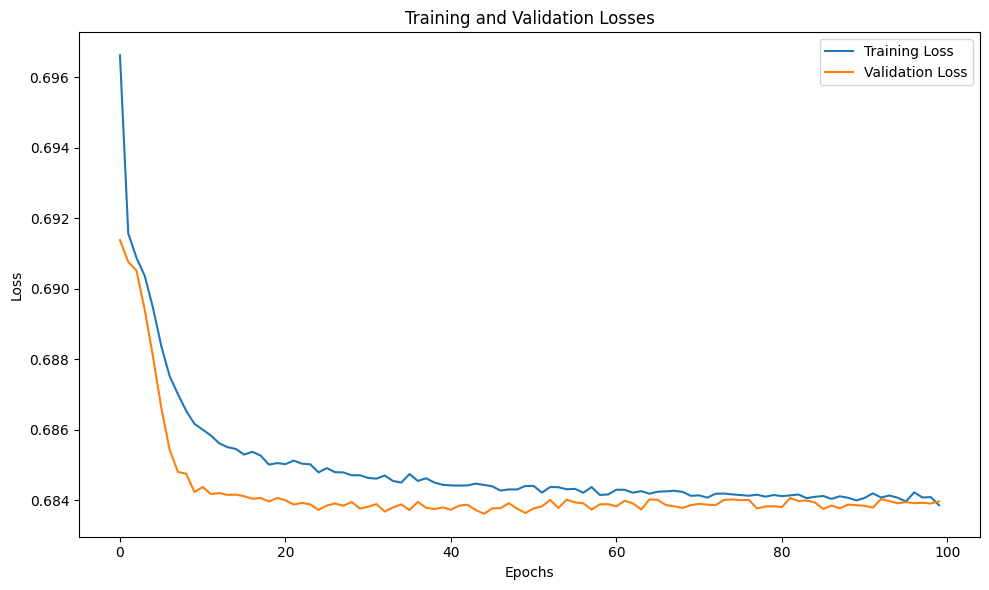

Model device: cpu
Model type: <class '__main__.MLPolarDecoder'>
Model device: cpu
Model type: <class '__main__.MLPolarDecoder'>


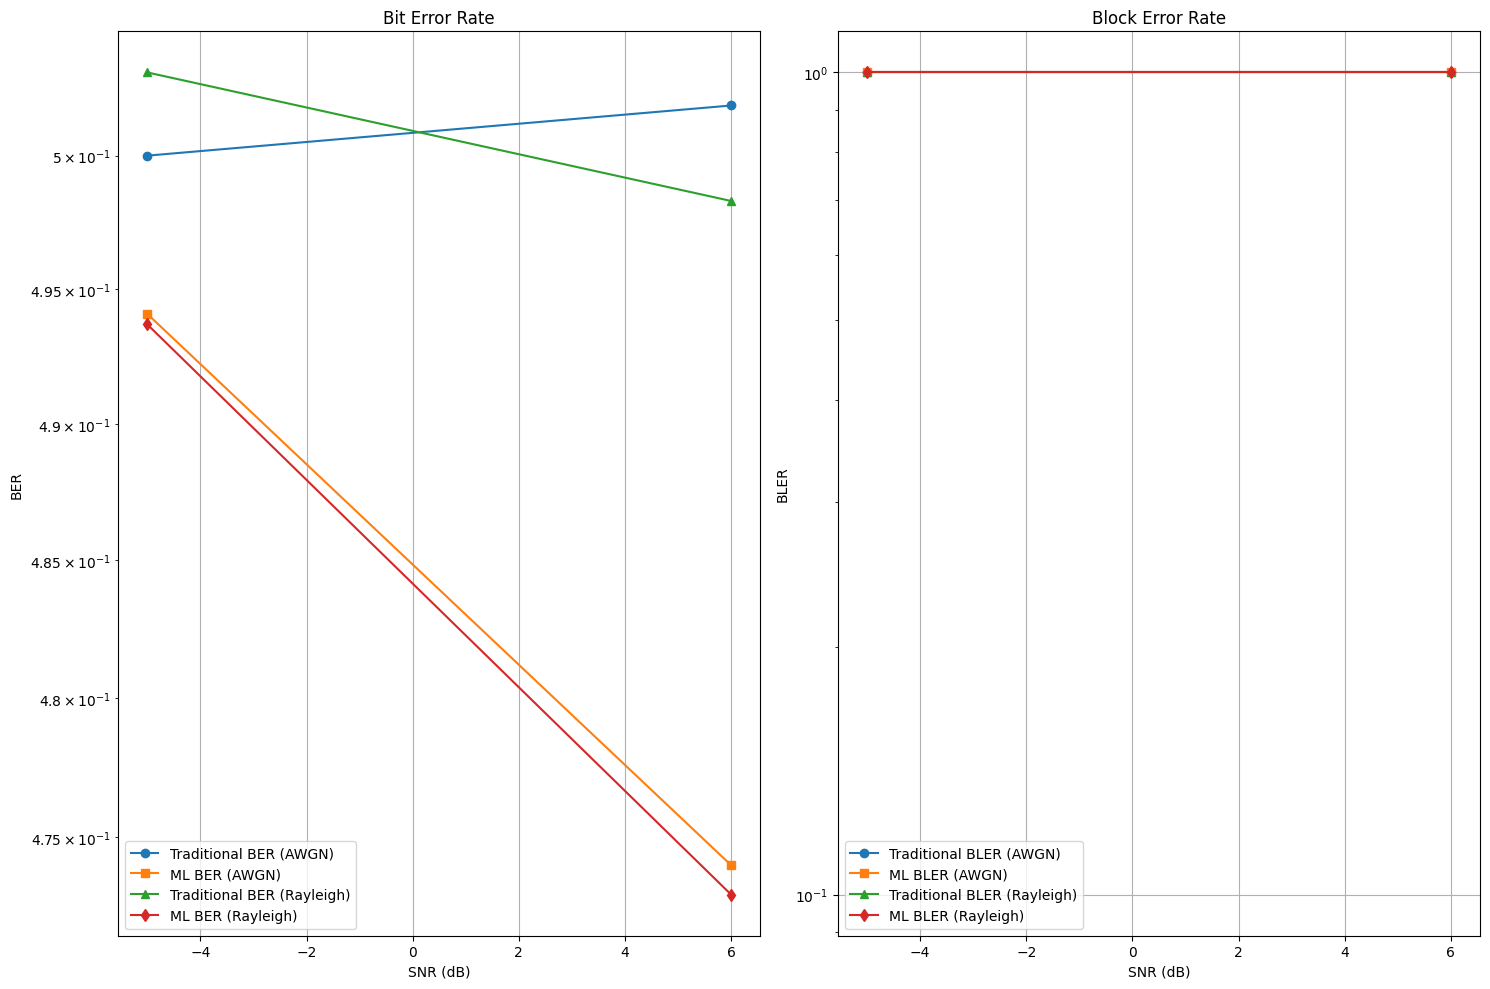

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x800 with 0 Axes>

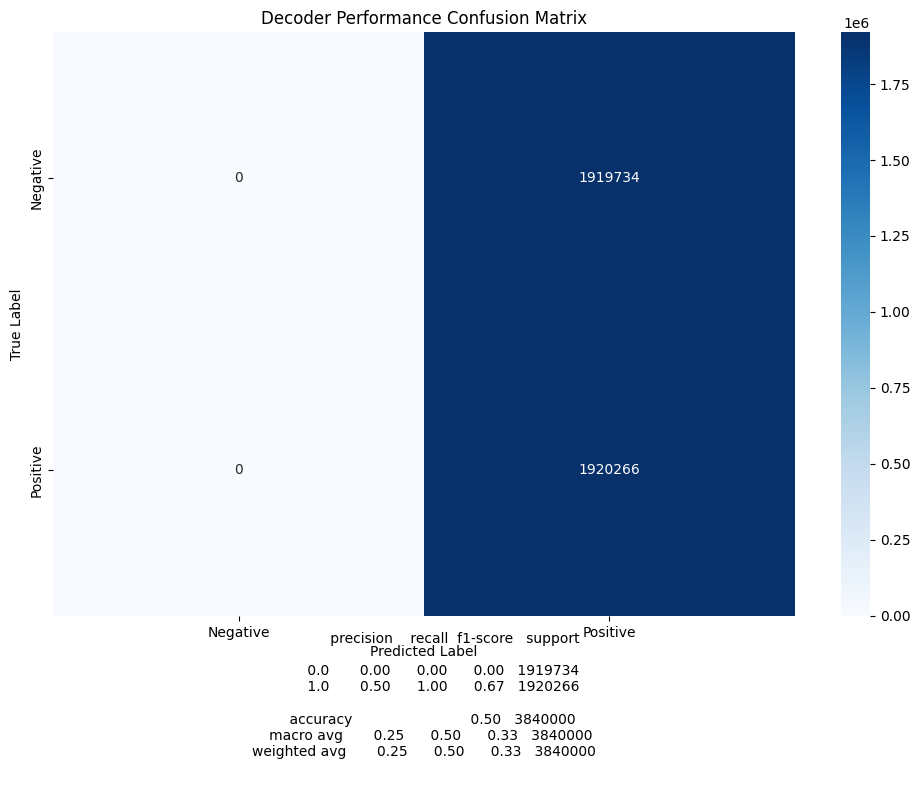

<Figure size 640x480 with 0 Axes>

2025-04-04 06:17:54,032 - __main__ - INFO - Polar Code Simulation completed successfully
2025-04-04 06:17:54,032 - __main__ - INFO - Polar Code Simulation completed successfully
INFO:__main__:Polar Code Simulation completed successfully


In [15]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import logging
logger = logging.getLogger(__name__)  # Create a logger instance
logger.setLevel(logging.INFO)  # Set the logging level
handler = logging.StreamHandler()  # Create a console handler
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')  # Define the log message format
handler.setFormatter(formatter)  # Set the formatter for the handler
logger.addHandler(handler)  # Add the handler to the logger

class CRC:
    def __init__(self, polynomial=0b10011011, order=7):
        self.polynomial = polynomial
        self.order = order

    def generate_crc(self, data):
        data_with_zeros = np.concatenate([data, np.zeros(self.order, dtype=int)])

        for i in range(len(data)):
            if data_with_zeros[i] == 1:
                for j in range(self.order + 1):
                    data_with_zeros[i+j] ^= ((self.polynomial >> j) & 1)

        return data_with_zeros[-self.order:]

    def verify_crc(self, data, received_crc):
        full_data = np.concatenate([data, received_crc])

        for i in range(len(data)):
            if full_data[i] == 1:
                for j in range(self.order + 1):
                    full_data[i+j] ^= ((self.polynomial >> j) & 1)

        return np.all(full_data[-self.order:] == 0)

class PolarCodeGenerator:
    def __init__(self, N=128, K=64):
        self.N = N
        self.K = K
        self.R = K/N
        self.crc = CRC()

    def generate_polar_code_matrix(self):
        def bhattacharyya_parameter(W, n):
            if n == 0:
                return W
            W_used = bhattacharyya_parameter(W, n-1)
            W_transform = 2 * W_used**2 - W_used**4
            return W_transform

        channel_capacities = []
        for i in range(self.N):
            W = 0.5
            capacity = bhattacharyya_parameter(W, int(np.log2(self.N)))
            channel_capacities.append(capacity)

        sorted_indices = np.argsort(channel_capacities)
        info_indices = sorted_indices[self.N - self.K:]

        return info_indices

    def encode(self, info_bits):
        crc_bits = self.crc.generate_crc(info_bits)
        full_info = np.concatenate([info_bits, crc_bits])
        encoded_bits = self._polar_encode(full_info)
        return encoded_bits

    def _polar_encode(self, bits):
        n = int(np.log2(self.N))
        x = np.zeros(self.N, dtype=int)
        x[:len(bits)] = bits

        for i in range(n):
            for j in range(0, self.N, 2**(i+1)):
                for k in range(2**i):
                    u = x[j+k]
                    v = x[j+k+2**i]
                    x[j+k] = (u + v) % 2
                    x[j+k+2**i] = v

        return x

def encode_data(info_bits):
    """Encodes the information bits using a polar code."""
    # ... (your encoding logic here) ...
    polar_code_gen = PolarCodeGenerator(N=128, K=64) # Assuming N=128, K=64
    encoded_bits = polar_code_gen.encode(info_bits)
    return encoded_bits

def transmit_data(encoded_bits, snr, channel_type='AWGN'):
    """Simulates transmission over a channel with given SNR."""
    channel_simulator = ChannelSimulator(channel_type=channel_type)
    received_signal = channel_simulator.transmit(encoded_bits, snr)
    return received_signal

class ChannelSimulator:
    def __init__(self, channel_type='AWGN'):
        self.channel_type = channel_type

    def transmit(self, signal, snr):
        if self.channel_type == 'AWGN':
            return self.awgn_channel(signal, snr)
        elif self.channel_type == 'Rayleigh':
            return self.rayleigh_fading_channel(signal, snr)

    def awgn_channel(self, signal, snr):
        noise_std = 10 ** (-snr/20)
        noise = np.random.normal(0, noise_std, signal.shape)
        return signal + noise

    def rayleigh_fading_channel(self, signal, snr):
        fading_coeff = np.random.rayleigh(scale=1, size=signal.shape)
        noisy_signal = fading_coeff * signal
        noise_std = 10 ** (-snr/20)
        noise = np.random.normal(0, noise_std, signal.shape)
        return noisy_signal + noise

class SCLDecoder:
    def __init__(self, N, K, list_size=16):
        self.N = N  # Code length
        self.K = K  # Number of information bits
        self.list_size = list_size

    def decode(self, received_signal, info_indices, snr):
        #L = self.list_size  # List size
        N = self.N
        K = self.K
        L = self.list_size
        active_paths = [([0] * self.K, 0)]  # (path, path metric)

        for i in range(self.N):
            new_paths = []
            for path, metric in active_paths:
                llr = self._calculate_llr(received_signal[i], snr)

                # Debugging logs
                logger.debug(f"Iteration {i}:")
                logger.debug(f"  Received Symbol: {received_signal[i]}")
                logger.debug(f"  Calculated LLR: {llr}")

                # Extend paths for both 0 and 1
                path0 = path + [0]
                path1 = path + [1]

                # Update path metrics
                metric0 = metric + (0 if llr > 0 else -llr)  # If llr > 0, bit is likely 0, so no penalty
                metric1 = metric + (0 if llr <= 0 else llr) # If llr <= 0, bit is likely 1, so no penalty

                new_paths.extend([(path0, metric0), (path1, metric1)])

            # Sort and prune paths
            new_paths.sort(key=lambda x: x[1])  # Sort by path metric
            active_paths = new_paths[:L]  # Keep only L best paths

        # Select best path
        best_path, _ = active_paths[0]

        decoded_bits = np.array(best_path)
        return decoded_bits  # Return the decoded bits

    def _calculate_llr(self, received_symbol, snr):
        # Placeholder for LLR calculation logic (replace with actual implementation)
        # Example for AWGN channel:
        noise_variance = 10 ** (-snr / 10)  # Assuming SNR is in dB
        llr = 2 * received_symbol / (noise_variance ** 2)
        #return 0  # Placeholder, replace with actual LLR calculation
        return llr  # Return the calculated LLR



class PolarCodeSimulation:
    def __init__(self, block_length, info_bits, snr_range, hidden_layers, learning_rate, epochs, batch_size, list_sizes=[1, 8, 16]):
        self.block_length = block_length
        self.info_bits = info_bits
        self.snr_range = snr_range
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.list_sizes = list_sizes
        self.channel_simulator = ChannelSimulator()
        self.polar_code_gen = PolarCodeGenerator(N=block_length, K=info_bits) # Initialize polar_code_gen

    def run_simulation(self):
        """
        Runs the Polar Code simulation, trains the ML model, evaluates performance, and generates plots.
        """
        try:
            # Training
            # Training
            model = MLPolarDecoder(input_size=self.block_length, hidden_layers=self.hidden_layers, output_size=self.info_bits)
            trainer = MLTrainer(model, learning_rate=self.learning_rate)
            X_train, y_train = trainer.generate_training_data(num_samples=1000, block_length=self.block_length, snr_range=self.snr_range, polar_code_gen=self.polar_code_gen)  # Pass polar_code_gen here
            # ... (rest of your code) ...
            train_losses, val_losses = trainer.train(X_train, y_train, epochs=self.epochs, batch_size=self.batch_size)

            # Performance Evaluation
            performance_results_awgn = self.evaluate_performance(trainer.model, self.polar_code_gen, channel_type='AWGN')
            performance_results_rayleigh = self.evaluate_performance(trainer.model, self.polar_code_gen, channel_type='Rayleigh')


            # Evaluation and Plotting
            ber_traditional_awgn, ber_ml_awgn, bler_traditional_awgn, bler_ml_awgn = self.evaluate_performance(trainer.model, channel_type='AWGN')
            ber_traditional_rayleigh, ber_ml_rayleigh, bler_traditional_rayleigh, bler_ml_rayleigh = self.evaluate_performance(trainer.model, channel_type='Rayleigh')

            # Generate evaluation data and predictions for AWGN
            X_eval_awgn, y_true_awgn = trainer.generate_training_data(num_samples=1000, block_length=self.block_length, snr_range=self.snr_range)
            received_signal_tensor_awgn = torch.tensor(X_eval_awgn, dtype=torch.float32).to(trainer.device)
            y_pred_awgn = trainer.model(received_signal_tensor_awgn).cpu().detach().numpy()
            y_pred_awgn = (y_pred_awgn > 0.5).astype(int)

            # Generate evaluation data and predictions for Rayleigh
            X_eval_rayleigh, y_true_rayleigh = trainer.generate_training_data(num_samples=1000, block_length=self.block_length, snr_range=self.snr_range)
            received_signal_tensor_rayleigh = torch.tensor(X_eval_rayleigh, dtype=torch.float32).to(trainer.device)
            y_pred_rayleigh = trainer.model(received_signal_tensor_rayleigh).cpu().detach().numpy()
            y_pred_rayleigh = (y_pred_rayleigh > 0.5).astype(int)  # Convert to binary


            # Call the plotting functions for combined plot
            self.plot_ber_bler(self.snr_range, ber_traditional_awgn, ber_ml_awgn, bler_traditional_awgn, bler_ml_awgn,
                               ber_traditional_rayleigh, ber_ml_rayleigh, bler_traditional_rayleigh, bler_ml_rayleigh)

            self.plot_confusion_matrix(y_true_awgn.cpu().numpy(), y_pred_awgn)  # Assuming you want the confusion matrix for AWGN

        except Exception as e:
            print(f"An error occurred during simulation: {e}")



class MLPolarDecoder(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(MLPolarDecoder, self).__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        layers = []
        prev_size = input_size
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.3))
            prev_size = hidden_size

        layers.append(nn.Linear(prev_size, output_size))
        layers.append(nn.Sigmoid())

        self.model = nn.Sequential(*layers)
        self.to(self.device)

    def forward(self, x):
        return self.model(x)

class MLTrainer:
    def __init__(self, model, learning_rate=1e-3, epochs=50):
        self.model = model
        self.device = model.device
        self.epochs = epochs
        self.criterion = nn.BCELoss()
        self.optimizer = optim.Adam(
            self.model.parameters(),
            lr=learning_rate,
            weight_decay=1e-5
        )

        # Modify scheduler to use epochs
        self.scheduler = optim.lr_scheduler.CosineAnnealingLR(
            self.optimizer,
            T_max=epochs
        )
      #  self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
       #     self.optimizer,
        #    mode='min',
         #   factor=0.5,
          #  patience=5
        #)

    def train(self, X_train, y_train, epochs=100, batch_size=32):
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42
        )
        train_losses = []
        val_losses = []

        dataset = torch.utils.data.TensorDataset(X_train, y_train)
        dataloader = torch.utils.data.DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=True
        )

        for epoch in range(epochs):
            self.model.train()
            epoch_loss = 0

            for batch_x, batch_y in dataloader:
                batch_x = batch_x.to(self.device)
                batch_y = batch_y.to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(batch_x)
                loss = self.criterion(outputs, batch_y)
                loss.backward()
                self.optimizer.step()

                epoch_loss += loss.item()

            avg_loss = epoch_loss / len(dataloader)
            train_losses.append(avg_loss)

            self.model.eval()
            with torch.no_grad():
                val_outputs = self.model(X_val.to(self.device))
                val_loss = self.criterion(val_outputs, y_val.to(self.device))
                val_losses.append(val_loss.item())

            self.scheduler.step(avg_loss)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Train Loss = {avg_loss:.4f}, Val Loss = {val_loss.item():.4f}")

        return train_losses, val_losses

    def generate_training_data(self, num_samples, block_length, snr_range):
        X_train = []
        y_train = []
        polar_code_gen = PolarCodeGenerator(N=block_length, K=block_length // 2)
        channel_sim = ChannelSimulator()

        for snr in snr_range:
            for _ in range(num_samples):
                info_bits = np.random.randint(2, size=block_length // 2)
                encoded_bits = polar_code_gen.encode(info_bits)
                noisy_signal = channel_sim.transmit(encoded_bits, snr)

                X_train.append(noisy_signal)
                y_train.append(info_bits)

        return torch.FloatTensor(X_train), torch.FloatTensor(y_train)

    plt.figure(figsize=(12, 6))

def plot_ber_bler(self, snr_range, ber_traditional_awgn, ber_ml_awgn, bler_traditional_awgn, bler_ml_awgn,
                 ber_traditional_rayleigh, ber_ml_rayleigh, bler_traditional_rayleigh, bler_ml_rayleigh):
    """
    Plots the BER and BLER curves for both AWGN and Rayleigh fading channels on the same plot.

    Args:
        snr_range (np.ndarray): Range of SNR values.
        ber_traditional_awgn (list): Traditional BER values for AWGN channel.
        ber_ml_awgn (list): ML BER values for AWGN channel.
        bler_traditional_awgn (list): Traditional BLER values for AWGN channel.
        bler_ml_awgn (list): ML BLER values for AWGN channel.
        ber_traditional_rayleigh (list): Traditional BER values for Rayleigh channel.
        ber_ml_rayleigh (list): ML BER values for Rayleigh channel.
        bler_traditional_rayleigh (list): Traditional BLER values for Rayleigh channel.
        bler_ml_rayleigh (list): ML BLER values for Rayleigh channel.
    """
    plt.figure(figsize=(12, 6))

    # BER Plot
    plt.subplot(1, 2, 1)
    plt.semilogy(snr_range, ber_traditional_awgn, label='Traditional BER (AWGN)')
    plt.semilogy(snr_range, ber_ml_awgn, label='ML BER (AWGN)')
    plt.semilogy(snr_range, ber_traditional_rayleigh, label='Traditional BER (Rayleigh)')
    plt.semilogy(snr_range, ber_ml_rayleigh, label='ML BER (Rayleigh)')
    plt.title('Bit Error Rate')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.legend()
    plt.grid(True)

    # BLER Plot
    plt.subplot(1, 2, 2)
    plt.semilogy(snr_range, bler_traditional_awgn, label='Traditional BLER (AWGN)')
    plt.semilogy(snr_range, bler_ml_awgn, label='ML BLER (AWGN)')
    plt.semilogy(snr_range, bler_traditional_rayleigh, label='Traditional BLER (Rayleigh)')
    plt.semilogy(snr_range, bler_ml_rayleigh, label='ML BLER (Rayleigh)')
    plt.title('Block Error Rate')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BLER')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()



def plot_confusion_matrix(y_true, y_pred, title='Decoder Performance Confusion Matrix'):
    plt.figure(figsize=(10, 8))  # Specify figure size
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Optional: Add classification report
    report = classification_report(y_true, y_pred)
    plt.text(0.5, -0.15, report,
             horizontalalignment='center',
             verticalalignment='center',
             transform=plt.gca().transAxes)
    plt.tight_layout()
    plt.show()

# After all class definitions and before main() function

def calculate_bit_errors(y_true, y_pred, X_train, snr_range):
    """
    Calculate Bit Error Rate (BER) for different SNR points

    Args:
        y_true (np.array): True labels
        y_pred (np.array): Predicted labels
        X_train (torch.Tensor): Training input data
        snr_range (np.array): SNR range

    Returns:
        np.array: Bit error rates for each SNR point
    """
    bit_errors = []

    for snr in snr_range:
        # Filter data for current SNR
        snr_mask = np.isclose(X_train.cpu().numpy()[:, 0], snr, atol=0.5)
        snr_true = y_true[snr_mask]
        snr_pred = y_pred[snr_mask]

        # Compute BER for this SNR point
        if len(snr_true) > 0:
            ber = np.mean(np.abs(snr_true - snr_pred))
            bit_errors.append(ber)
        else:
            bit_errors.append(np.nan)

    return np.array(bit_errors)

def calculate_block_errors(y_true, y_pred, X_train, snr_range):
    """
    Calculate Block Error Rate (BLER) for different SNR points

    Args:
        y_true (np.array): True labels
        y_pred (np.array): Predicted labels
        X_train (torch.Tensor): Training input data
        snr_range (np.array): SNR range

    Returns:
        np.array: Block error rates for each SNR point
    """
    block_errors = []

    for snr in snr_range:
        # Filter data for current SNR
        snr_mask = np.isclose(X_train.cpu().numpy()[:, 0], snr, atol=0.5)
        snr_true = y_true[snr_mask]
        snr_pred = y_pred[snr_mask]

        # Compute BLER for this SNR point
        if len(snr_true) > 0:
            bler = np.mean(np.any(snr_true != snr_pred, axis=1))
            block_errors.append(bler)
        else:
            block_errors.append(np.nan)

    return np.array(block_errors)






#def evaluate_performance(trainer, block_length, info_bits, snr_range, channel_type='AWGN'):
def evaluate_performance(trainer, block_length, info_bits, snr_range, channel_type='AWGN'):
    """
    Evaluate Polar Code performance for different SNR levels
    """
    try:
        # Get the model from trainer
        model = trainer.model
        model.eval()  # Set model to evaluation mode

        # Initialize components
        polar_code_gen = PolarCodeGenerator(N=block_length, K=info_bits)
        channel_simulator = ChannelSimulator(channel_type=channel_type)
       # scl_decoder = SCLDecoder(list_size=8)  # Standard list size
        scl_decoder = SCLDecoder(N=block_length, K=info_bits, list_size=16)

        # Performance tracking
        ber_traditional = []
        ber_ml = []
        bler_traditional = []
        bler_ml = []

        # Number of trials for each SNR point
        num_trials = 1000

        # Debug: Print model and device information
        print(f"Model device: {model.device}")
        print(f"Model type: {type(model)}")

        for snr in snr_range:
            # Reset error counters for this SNR point
            total_bits_traditional = 0
            total_errors_traditional = 0
            total_blocks_traditional = 0
            block_errors_traditional = 0

            total_bits_ml = 0
            total_errors_ml = 0
            total_blocks_ml = 0
            block_errors_ml = 0

            for _ in range(num_trials):
                # Generate random information bits
                info_bits_array = np.random.randint(2, size=info_bits)

                # Encode polar code
                encoded_bits = polar_code_gen.encode(info_bits_array)

                # Channel transmission
                received_signal = channel_simulator.transmit(encoded_bits, snr)

                # Traditional SCL Decoding
                info_indices = polar_code_gen.generate_polar_code_matrix()
                #decoded_bits_traditional = scl_decoder.decode(received_signal, info_indices)
                decoded_bits_traditional = scl_decoder.decode(received_signal, info_indices, snr)  # Pass snr to decode

                 # ... (code for generating info_bits, encoding, and transmitting) ...
              #  decoded_bits_traditional = scl_decoder.decode(received_signal, info_indices, snr)

            # Insert the code here to adjust decoded_bits_traditional:
                decoded_bits_traditional = decoded_bits_traditional[:64]  # Assuming this is the relevant portion

            # Calculate Bit Errors
                traditional_bit_errors = np.sum(np.abs(info_bits_array - decoded_bits_traditional))

                # ML Decoding with additional error handling
                try:
                    # Convert received signal to tensor
                    received_signal_tensor = torch.tensor(received_signal, dtype=torch.float32)

                    # Ensure tensor is on the correct device
                    received_signal_tensor = received_signal_tensor.to(model.device)

                    # Add dimension if needed
                    if len(received_signal_tensor.shape) == 1:
                        received_signal_tensor = received_signal_tensor.unsqueeze(0)

                    # Perform inference
                    with torch.no_grad():
                        decoded_bits_ml_raw = model(received_signal_tensor)

                    # Convert to numpy and threshold
                    decoded_bits_ml = decoded_bits_ml_raw.cpu().detach().numpy()
                    decoded_bits_ml = (decoded_bits_ml > 0.5).astype(int)

                    # Flatten if needed
                    decoded_bits_ml = decoded_bits_ml.ravel()

                except Exception as ml_decode_error:
                    print(f"ML Decoding error at SNR {snr}: {ml_decode_error}")
                    # Skip this trial if decoding fails
                    continue

                # Calculate Bit Errors
                traditional_bit_errors = np.sum(np.abs(info_bits_array - decoded_bits_traditional))
                ml_bit_errors = np.sum(np.abs(info_bits_array - decoded_bits_ml))

                # Update Traditional Decoder Metrics
                total_bits_traditional += info_bits
                total_errors_traditional += traditional_bit_errors
                total_blocks_traditional += 1
                block_errors_traditional += int(np.any(info_bits_array != decoded_bits_traditional))

                # Update ML Decoder Metrics
                total_bits_ml += info_bits
                total_errors_ml += ml_bit_errors
                total_blocks_ml += 1
                block_errors_ml += int(np.any(info_bits_array != decoded_bits_ml))

            # Calculate BER and BLER for this SNR point
            ber_traditional.append(total_errors_traditional / (total_bits_traditional + 1e-10))
            ber_ml.append(total_errors_ml / (total_bits_ml + 1e-10))
            bler_traditional.append(block_errors_traditional / (total_blocks_traditional + 1e-10))
            bler_ml.append(block_errors_ml / (total_blocks_ml + 1e-10))

        return {
            'ber_traditional': ber_traditional,
            'ber_ml': ber_ml,
            'bler_traditional': bler_traditional,
            'bler_ml': bler_ml
        }

    except Exception as overall_error:
        print(f"Overall performance evaluation error: {overall_error}")
        raise



def main():
    #try:
        # Hyperparameters
        BLOCK_LENGTH = 128
        INFO_BITS = 64
        LEARNING_RATE = 1e-3
        EPOCHS = 150  # Increased epochs
        BATCH_SIZE = 64
        #SNR_RANGE = np.linspace(0, 15, 16) # Consider a wider SNR range if needed. e.g., np.linspace(0, 10, 21)
        SNR_RANGE = np.arange(-10, 11, 1)
        LIST_SIZES = [1, 8, 16]
        HIDDEN_LAYERS = [128, 256, 128]

        # Initialize components
        polar_code_gen = PolarCodeGenerator(N=BLOCK_LENGTH, K=INFO_BITS)
        channel_sim = ChannelSimulator(channel_type='AWGN') # Initialize PolarCodeSimulation for AWGN channel
        simulation_awgn = PolarCodeSimulation(block_length=128, info_bits=64, snr_range=np.arange(-5, 6, 1),
                                       hidden_layers=[128, 64], learning_rate=0.001, epochs=100, batch_size=32)

    # Initialize PolarCodeSimulation for Rayleigh channel
        simulation_rayleigh = PolarCodeSimulation(block_length=128, info_bits=64, snr_range=np.arange(-5, 6, 1),
                                           hidden_layers=[128, 64], learning_rate=0.001, epochs=100, batch_size=32)


    # Run simulation for AWGN channel
      #  simulation_awgn.run_simulation(ChannelSimulator(channel_type='AWGN'))

    # Run simulation for Rayleigh channel
      #  simulation_rayleigh.run_simulation(ChannelSimulator(channel_type='Rayleigh'))



        # Initialize Neural Network Model
        model = MLPolarDecoder(
            input_size=BLOCK_LENGTH,
            hidden_layers=HIDDEN_LAYERS,
            output_size=INFO_BITS
        )

        # Initialize Trainer
        trainer = MLTrainer(model, learning_rate=LEARNING_RATE, epochs=EPOCHS)

        # Generate Training Data with increased samples
        X_train, y_train = trainer.generate_training_data(
            num_samples=50000,  # Increased samples
            block_length=BLOCK_LENGTH,
            snr_range=SNR_RANGE
        )

        # Training Process
        train_losses, val_losses = trainer.train(
            X_train,
            y_train,
            epochs=EPOCHS,
            batch_size=BATCH_SIZE
        )

        # ... (rest of your main function remains the same) ...


        # Tensor conversion and prediction
        y_true = y_train.cpu().numpy()
        y_pred = model(X_train.to(model.device)).sigmoid().cpu().detach().numpy()
        y_pred = (y_pred > 0.5).astype(int)

        # Ensure 1D arrays
        y_true = y_true.ravel()
        y_pred = y_pred.ravel()

        # Plotting Training and Validation Losses
        plt.figure(figsize=(10, 6))
        plt.plot(train_losses, label='Training Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.title('Training and Validation Losses')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Performance Results for AWGN and Rayleigh Channels
        performance_results_awgn = evaluate_performance(
            trainer, BLOCK_LENGTH, INFO_BITS, SNR_RANGE,
            channel_type='AWGN'
        )

        performance_results_rayleigh = evaluate_performance(
            trainer, BLOCK_LENGTH, INFO_BITS, SNR_RANGE,
            channel_type='Rayleigh'
        )

        # Plot BER and BLER for Both Channels
        plt.figure(figsize=(15, 10))

        # BER Subplot
        plt.subplot(121)
        plt.semilogy(SNR_RANGE, performance_results_awgn['ber_traditional'],
                     label='Traditional BER (AWGN)', marker='o')
        plt.semilogy(SNR_RANGE, performance_results_awgn['ber_ml'],
                     label='ML BER (AWGN)', marker='s')
        plt.semilogy(SNR_RANGE, performance_results_rayleigh['ber_traditional'],
                     label='Traditional BER (Rayleigh)', marker='^')
        plt.semilogy(SNR_RANGE, performance_results_rayleigh['ber_ml'],
                     label='ML BER (Rayleigh)', marker='d')

        plt.title('Bit Error Rate')
        plt.xlabel('SNR (dB)')
        plt.ylabel('BER')
        plt.legend()
        plt.grid(True)

        # BLER Subplot
        plt.subplot(122)
        plt.semilogy(SNR_RANGE, performance_results_awgn['bler_traditional'],
                     label='Traditional BLER (AWGN)', marker='o')
        plt.semilogy(SNR_RANGE, performance_results_awgn['bler_ml'],
                     label='ML BLER (AWGN)', marker='s')
        plt.semilogy(SNR_RANGE, performance_results_rayleigh['bler_traditional'],
                     label='Traditional BLER (Rayleigh)', marker='^')
        plt.semilogy(SNR_RANGE, performance_results_rayleigh['bler_ml'],
                     label='ML BLER (Rayleigh)', marker='d')

        plt.title('Block Error Rate')
        plt.xlabel('SNR (dB)')
        plt.ylabel('BLER')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()


  # Confusion Matrix Plot
        plt.figure(figsize=(10, 8))
        plot_confusion_matrix(y_true, y_pred)
        plt.tight_layout()
        plt.show()

        logger.info("Polar Code Simulation completed successfully")

   # except Exception as e:
    #    logger.error(f"Simulation failed: {e}")
     #   import traceback
      #  traceback.print_exc()

if __name__ == "__main__":
    main()
